# Student Information

Name: Virintorn Kantaravichaiwat

Student ID: 110065427

GitHub ID: sandvirin

# Data Mining Lab 1 - Homework
This workbook contains #2 follow the same process as Lab1 with the new dataset #3 New data visualization, Generate TF-IDF features, Implement a simple Naive Bayes classifier

---

## Table of Contents
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Adding Column
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Dimensionality Reduction
 - 5.5 Atrribute Transformation / Aggregation
 - 5.6 Discretization and Binarization
6. Data Exploration
7. New Data Visualizations
8. TF-IDF features
9. Naive Bayes classifier & Conclusion

---

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

---

## 1. Data Source
We will explore th Sentiment Labelled Sentences Data Set, originally provided  [here](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). 

Data Set Information:
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015. It contains sentences labelled with positive or negative sentiment.

Format: sentence score
Detials: Score is either 1 (for positive) or 0 (for negative)
The sentences come from three different websites/fields:
imdb.com
amazon.com
yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews.
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

Attribute Information:
The attributes are text sentences, extracted from reviews of products, movies, and restaurants

Relevant Papers:
'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

Citation Request:
'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

---

## 2. Data Preparation
import data for 3 files: amazon, imdb, yelp & query data

In [2]:
import pandas as pd
import numpy as np

In [3]:
# sentiment
sentiment = ['positive', 'negative']

In [4]:
# import data

import os
amzn = pd.read_table(os.path.expanduser("/Users/sand/Desktop/DMLab1/DM2021-Lab1-Homework/sentiment labelled sentences/amazon_cells_labelled.txt"))
imdb = pd.read_table(os.path.expanduser("/Users/sand/Desktop/DMLab1/DM2021-Lab1-Homework/sentiment labelled sentences/imdb_labelled.txt"))
yelp = pd.read_table(os.path.expanduser("/Users/sand/Desktop/DMLab1/DM2021-Lab1-Homework/sentiment labelled sentences/yelp_labelled.txt"))

In [5]:
# adding column name to the respective columns
amzn.columns =['sentence', 'score']
imdb.columns =['sentence', 'score']
yelp.columns =['sentence', 'score']

In [6]:
#add column source: websites/fields
amzn['source']='amazon.com'
imdb['source']='imdb.com'
yelp['source']='yelp.com'

In [7]:
# merge 3 text files to 1 files as 'data'
data = amzn.append(imdb).append(yelp)
data

,sentence,score,source
0,"Good case, Excellent value.",1,amazon.com
1,Great for the jawbone.,1,amazon.com
2,Tied to charger for conversations lasting more...,0,amazon.com
3,The mic is great.,1,amazon.com
4,I have to jiggle the plug to get it to line up...,0,amazon.com
...,...,...,...
994,I think food should have flavor and texture an...,0,yelp.com
995,Appetite instantly gone.,0,yelp.com
996,Overall I was not impressed and would not go b...,0,yelp.com
997,"The whole experience was underwhelming, and I ...",0,yelp.com


In [8]:
#add column lenght for counting no. of charactor of each sentence
data["length"]= data["sentence"].str.len()

In [9]:
#print data
data

,sentence,score,source,length
0,"Good case, Excellent value.",1,amazon.com,27
1,Great for the jawbone.,1,amazon.com,22
2,Tied to charger for conversations lasting more...,0,amazon.com,79
3,The mic is great.,1,amazon.com,17
4,I have to jiggle the plug to get it to line up...,0,amazon.com,74
...,...,...,...,...
994,I think food should have flavor and texture an...,0,yelp.com,66
995,Appetite instantly gone.,0,yelp.com,24
996,Overall I was not impressed and would not go b...,0,yelp.com,50
997,"The whole experience was underwhelming, and I ...",0,yelp.com,91


In [10]:
# check no. sentences
len(data.sentence)

2745

In [11]:
# check no. scores
len(data.score)

2745

... and determine the label of the example via `sentence` key value

In [12]:
print(data.sentence[data.score[0]])

1                               Great for the jawbone.
1    Attempting artiness with black & white and cle...
1            Not tasty and the texture was just nasty.
0                          Good case, Excellent value.
0    Not sure who was more lost - the flat characte...
0                                   Crust is not good.
0                          Good case, Excellent value.
0    Not sure who was more lost - the flat characte...
0                                   Crust is not good.
Name: sentence, dtype: object


In [13]:
data.score[0]

0    1
0    0
0    0
Name: score, dtype: int64

... we can also get the category of 10 documents via `target` key value 

In [14]:
# score of first 25 documents.
data.score[:25]

0     1
1     1
2     0
3     1
4     0
5     0
6     1
7     0
8     0
9     1
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17    1
18    0
19    0
20    1
21    0
22    1
23    0
24    1
Name: score, dtype: int64

In [15]:
for t in data["sentence"][:10]:
    print(t)

Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
The mic is great.
I have to jiggle the plug to get it to line up right to get decent volume.
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.
If you are Razr owner...you must have this!
Needless to say, I wasted my money.
What a waste of money and time!.
And the sound quality is great.


---

---

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

---

### 3.1 Adding Columns

In [16]:
# my functions
import helpers.data_mining_helpers as dmh

In [17]:
len(data)

2745

In [18]:
data[0:2]

,sentence,score,source,length
0,"Good case, Excellent value.",1,amazon.com,27
1,Great for the jawbone.,1,amazon.com,22


In [19]:
for t in data["sentence"][:3]:
    print(t)

Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!


In [20]:
# add column sentiment, if score=1,sentiment=positive, if not, sentiment=negative

data['sentiment'] = np.where(data['score']==1,'positive','negative')

In [21]:
# add length of each sentence
data["length"]= data["sentence"].str.len()

In [22]:
data[0:10]

,sentence,score,source,length,sentiment
0,"Good case, Excellent value.",1,amazon.com,27,positive
1,Great for the jawbone.,1,amazon.com,22,positive
2,Tied to charger for conversations lasting more...,0,amazon.com,79,negative
3,The mic is great.,1,amazon.com,17,positive
4,I have to jiggle the plug to get it to line up...,0,amazon.com,74,negative
5,If you have several dozen or several hundred c...,0,amazon.com,111,negative
6,If you are Razr owner...you must have this!,1,amazon.com,43,positive
7,"Needless to say, I wasted my money.",0,amazon.com,35,negative
8,What a waste of money and time!.,0,amazon.com,32,negative
9,And the sound quality is great.,1,amazon.com,31,positive


Nice! Isn't it? With this format we can conduct many operations easily and efficiently since Pandas dataframes provide us with a wide range of built-in features/functionalities. These features are operations which can directly and quickly be applied to the dataset. These operations may include standard operations like **removing records with missing values** and **aggregating new fields** to the current table (hereinafter referred to as a dataframe), which is desirable in almost every data mining project. Go Pandas!

---

### 3.2 Familiarizing yourself with the Data

In [23]:
# a simple query
data[0:10][["sentence", "sentiment","source"]]

,sentence,sentiment,source
0,"Good case, Excellent value.",positive,amazon.com
1,Great for the jawbone.,positive,amazon.com
2,Tied to charger for conversations lasting more...,negative,amazon.com
3,The mic is great.,positive,amazon.com
4,I have to jiggle the plug to get it to line up...,negative,amazon.com
5,If you have several dozen or several hundred c...,negative,amazon.com
6,If you are Razr owner...you must have this!,positive,amazon.com
7,"Needless to say, I wasted my money.",negative,amazon.com
8,What a waste of money and time!.,negative,amazon.com
9,And the sound quality is great.,positive,amazon.com


In [24]:
# query last digit
data[-10:]

,sentence,score,source,length,sentiment
989,The refried beans that came with my meal were ...,0,yelp.com,90,negative
990,Spend your money and time some place else.,0,yelp.com,42,negative
991,A lady at the table next to us found a live gr...,0,yelp.com,75,negative
992,the presentation of the food was awful.,0,yelp.com,39,negative
993,I can't tell you how disappointed I was.,0,yelp.com,40,negative
994,I think food should have flavor and texture an...,0,yelp.com,66,negative
995,Appetite instantly gone.,0,yelp.com,24,negative
996,Overall I was not impressed and would not go b...,0,yelp.com,50,negative
997,"The whole experience was underwhelming, and I ...",0,yelp.com,91,negative
998,"Then, as if I hadn't wasted enough of my life ...",0,yelp.com,134,negative


Ready for some sourcery? Brace yourselves! Let us see if we can query every 10th record in our dataframe. In addition, our query must only contain the first 10 records. For this we will use the build-in function called `iloc`. This allows us to query a selection of our dataset by position. 

In [25]:
# using loc (by position)
data.iloc[::10, 0:2][0:10]

,sentence,score
0,"Good case, Excellent value.",1
10,He was very impressed when going from the orig...,1
20,I bought this to use with my Kindle Fire and a...,1
30,This product is ideal for people like me whose...,1
40,I was not impressed by this product.,0
50,good protection and does not make phone too bu...,1
60,I really recommend this faceplates since it lo...,1
70,"Even in my BMW 3 series which is fairly quiet,...",0
80,Not a good bargain.,0
90,Made very sturdy.,1


You can also use the `loc` function to explicity define the columns you want to query. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

In [26]:
# using loc (by label)
data.loc[::10, 'sentence'][0:10]

0                           Good case, Excellent value.
10    He was very impressed when going from the orig...
20    I bought this to use with my Kindle Fire and a...
30    This product is ideal for people like me whose...
40                 I was not impressed by this product.
50    good protection and does not make phone too bu...
60    I really recommend this faceplates since it lo...
70    Even in my BMW 3 series which is fairly quiet,...
80                                  Not a good bargain.
90                                    Made very sturdy.
Name: sentence, dtype: object

In [27]:
# standard query (Cannot simultaneously select rows and columns)
data[::10][0:10]

,sentence,score,source,length,sentiment
0,"Good case, Excellent value.",1,amazon.com,27,positive
10,He was very impressed when going from the orig...,1,amazon.com,83,positive
20,I bought this to use with my Kindle Fire and a...,1,amazon.com,65,positive
30,This product is ideal for people like me whose...,1,amazon.com,71,positive
40,I was not impressed by this product.,0,amazon.com,36,negative
50,good protection and does not make phone too bu...,1,amazon.com,50,positive
60,I really recommend this faceplates since it lo...,1,amazon.com,78,positive
70,"Even in my BMW 3 series which is fairly quiet,...",0,amazon.com,102,negative
80,Not a good bargain.,0,amazon.com,19,negative
90,Made very sturdy.,1,amazon.com,17,positive


In [28]:
#iloc by position
data.iloc[[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]]

,sentence,score,source,length,sentiment
0,"Good case, Excellent value.",1,amazon.com,27,positive
10,He was very impressed when going from the orig...,1,amazon.com,83,positive
20,I bought this to use with my Kindle Fire and a...,1,amazon.com,65,positive
30,This product is ideal for people like me whose...,1,amazon.com,71,positive
40,I was not impressed by this product.,0,amazon.com,36,negative
50,good protection and does not make phone too bu...,1,amazon.com,50,positive
60,I really recommend this faceplates since it lo...,1,amazon.com,78,positive
70,"Even in my BMW 3 series which is fairly quiet,...",0,amazon.com,102,negative
80,Not a good bargain.,0,amazon.com,19,negative
90,Made very sturdy.,1,amazon.com,17,positive


---

Try to fecth records belonging to the ```positive``` sentiment, and query every 100th record. Only show the first 5 records.

In [29]:
data.loc[lambda f: f.sentiment == 'positive'].iloc[::100, :][0:5]

,sentence,score,source,length,sentiment
0,"Good case, Excellent value.",1,amazon.com,27,positive
195,You'll love how thin it is.,1,amazon.com,27,positive
383,Magical Help.,1,amazon.com,13,positive
577,It does everything the description said it would.,1,amazon.com,49,positive
777,This is a great deal.,1,amazon.com,21,positive


---

## 4. Data Mining using Pandas

### 4.1 Missing Values

The methods used to deal with missing values

- **Eliminate Data Objects** - Here we completely discard records once they contain some missing values. This is the easiest approach and the one we will be using in this notebook. The immediate drawback of going with this approach is that you lose some information, and in some cases too much of it. Now imagine that half of the records have at least one or more missing values. Here you are presented with the tough decision of quantity vs quality. In any event, this decision must be made carefully, hence the reason for emphasizing it here in this notebook. 

- **Estimate Missing Values** - Here we try to estimate the missing values based on some criteria. Although this approach may be proven to be effective, it is not always the case, especially when we are dealing with sensitive data, like **Gender** or **Names**. For fields like **Address**, there could be ways to obtain these missing addresses using some data aggregation technique or obtain the information directly from other databases or public data sources.

- **Ignore the missing value during analysis** - Here we basically ignore the missing values and proceed with our analysis. Although this is the most naive way to handle missing values it may proof effective, especially when the missing values includes information that is not important to the analysis being conducted. But think about it for a while. Would you ignore missing values, especially when in this day and age it is difficult to obtain high quality datasets? Again, there are some tradeoffs, which we will talk about later in the notebook.

- **Replace with all possible values** - As an efficient and responsible data miner, we sometimes just need to put in the hard hours of work and find ways to makes up for these missing values. This last option is a very wise option for cases where data is scarce (which is almost always) or when dealing with sensitive data. Imagine that our dataset has an **Age** field, which contains many missing values. Since **Age** is a continuous variable, it means that we can build a separate model for calculating the age for the incomplete records based on some rule-based appraoch or probabilistic approach.  

In [30]:
#Finding missing value
data.isnull()

,sentence,score,source,length,sentiment
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
994,False,False,False,False,False
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False


The `isnull` function looks through the entire dataset for null values and returns `True` wherever it finds any missing field or record.

In [31]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source,length,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


---

Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  

In [32]:
#give number of NaN values in every row, if col. use axis=0
data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
994    (The amoung of missing records is: , 0)
995    (The amoung of missing records is: , 0)
996    (The amoung of missing records is: , 0)
997    (The amoung of missing records is: , 0)
998    (The amoung of missing records is: , 0)
Length: 2745, dtype: object

---

### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us stick with the basics. As we have learned in our Data Mining course, duplicate data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data.

check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` function that we used to check for missing values. 

In [33]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Length: 2745, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [34]:
sum(data.duplicated())

17

In [35]:
# check duplicate data in 'sentence', main attribute
sum(data.duplicated('sentence'))

17

In [36]:
# inplace applies changes directly on our dataframe, remove duplicate data
data.drop_duplicates(keep=False, inplace=True) 

In [37]:
len(data)

2711

---

## 5.  Data Preprocessing
Ways of performing data preprocessing
- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling

In [38]:
data_sample = data.sample(n=1000) #random state

In [39]:
len(data_sample)

1000

In [40]:
data_sample[0:10]

,sentence,score,source,length,sentiment
404,I especially love the long battery life.,1,amazon.com,40,positive
570,"It's a fresh, subtle, and rather sublime effec...",1,imdb.com,50,positive
699,The chips that came out were dripping with gre...,0,yelp.com,73,negative
112,This film has no redeeming features.,0,imdb.com,38,negative
766,The block was amazing.,1,yelp.com,22,positive
345,Reception is terrible and full of static.,0,amazon.com,41,negative
92,"Again, no plot at all.",0,imdb.com,24,negative
854,My fella got the huevos rancheros and they did...,0,yelp.com,69,negative
199,Non-linear narration thus many flashbacks and ...,1,imdb.com,86,positive
159,"All I can do is whine on the Internet, so here...",0,amazon.com,99,negative


---

Using `matplotlib` python library to visualize data

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
data.score

0      1
1      1
2      0
3      1
4      0
      ..
994    0
995    0
996    0
997    0
998    0
Name: score, Length: 2711, dtype: int64

positive    1365
negative    1346
Name: sentiment, dtype: int64


<AxesSubplot:title={'center':'Sentiment Labelled Sentences'}>

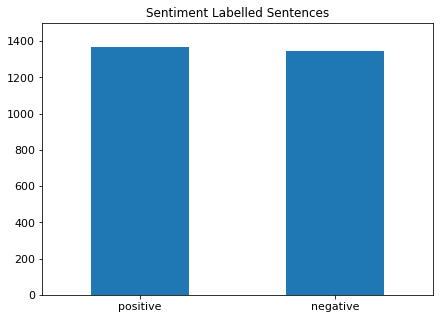

In [43]:
print(data.sentiment.value_counts())

# plot barchart for data
data.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment Labelled Sentences',
                                    ylim = [0, 1500],        
                                    rot = 0, fontsize = 11, figsize = (7,5))

negative    503
positive    497
Name: sentiment, dtype: int64


<AxesSubplot:title={'center':'Sentiment Labelled Sentences'}>

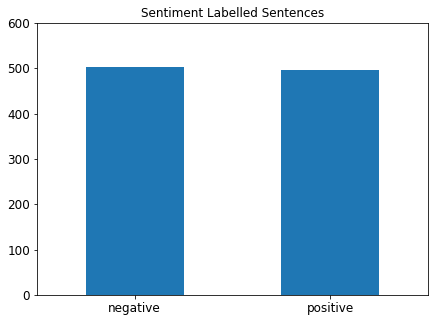

In [44]:
print(data_sample.sentiment.value_counts())

# plot barchart for data_sample
data_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment Labelled Sentences',
                                           ylim = [0, 600], 
                                           rot = 0, fontsize = 12, figsize = (7,5))

---

Automate the height of barchart

positive    1365
negative    1346
Name: sentiment, dtype: int64


<AxesSubplot:title={'center':'Sentiment Labelled Sentences'}>

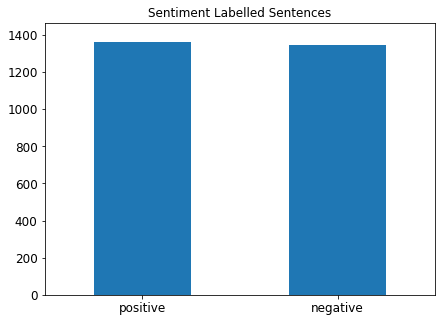

In [45]:
upper_bound = max(data.sentiment.value_counts()) + 100

print(data.sentiment.value_counts())

# plot barchart for X_sample
data.sentiment.value_counts().plot(kind = 'bar',
                                          title = 'Sentiment Labelled Sentences',
                                          ylim = [0, upper_bound],
                                          rot = 0, fontsize = 12, figsize = (7,5))

---

Side-by-side comparison of the sentiment distribution between 2 data; raw data & sample data

positive    1365
negative    1346
Name: sentiment, dtype: int64
negative    503
positive    497
Name: sentiment, dtype: int64


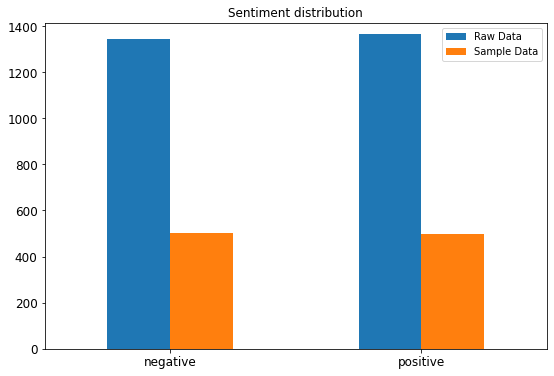

In [46]:
# Upper bound
upper_bound = max(data.sentiment.value_counts()) + 50

# print data
print(data.sentiment.value_counts())
print(data_sample.sentiment.value_counts())

# plot barchart
df = pd.DataFrame({'Raw Data': data.sentiment.value_counts(),
                   'Sample Data': data_sample.sentiment.value_counts()})
ax = df.plot.bar(title = 'Sentiment distribution',
                 ylim = [0, upper_bound],rot = 0, fontsize = 12,
                 figsize = (9,6))

---

### 5.2 Feature Creation
Using NLTK library which is a natural language processing tool used for text mining tasks

In [47]:
import nltk

In [48]:
# takes a like a minute or two to process
data['unigrams'] = data['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [49]:
data[0:4]["unigrams"]

0                 [Good, case, ,, Excellent, value, .]
1                        [Great, for, the, jawbone, .]
2    [Tied, to, charger, for, conversations, lastin...
3                             [The, mic, is, great, .]
Name: unigrams, dtype: object

In [50]:
data[0:4]

,sentence,score,source,length,sentiment,unigrams
0,"Good case, Excellent value.",1,amazon.com,27,positive,"[Good, case, ,, Excellent, value, .]"
1,Great for the jawbone.,1,amazon.com,22,positive,"[Great, for, the, jawbone, .]"
2,Tied to charger for conversations lasting more...,0,amazon.com,79,negative,"[Tied, to, charger, for, conversations, lastin..."
3,The mic is great.,1,amazon.com,17,positive,"[The, mic, is, great, .]"


In [51]:
list(data[0:1]['unigrams'])

[['Good', 'case', ',', 'Excellent', 'value', '.']]

---

### 5.3 Feature subset selection
Generate a document-term matrix from the original dataset.

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentence)

In [53]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(data[4:5].sentence))

['hello', 'world']

---

Analyze the first record of our X dataframe with the new analyzer

In [54]:
analyze(" ".join(list(data[0:1].sentence)))

['good', 'case', 'excellent', 'value']

---

look at the term-document matrix we built above.

In [55]:
# check the shape of this matrix by:
data_counts.shape

(2711, 5149)

In [56]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [57]:
data[0:5]

,sentence,score,source,length,sentiment,unigrams
0,"Good case, Excellent value.",1,amazon.com,27,positive,"[Good, case, ,, Excellent, value, .]"
1,Great for the jawbone.,1,amazon.com,22,positive,"[Great, for, the, jawbone, .]"
2,Tied to charger for conversations lasting more...,0,amazon.com,79,negative,"[Tied, to, charger, for, conversations, lastin..."
3,The mic is great.,1,amazon.com,17,positive,"[The, mic, is, great, .]"
4,I have to jiggle the plug to get it to line up...,0,amazon.com,74,negative,"[I, have, to, jiggle, the, plug, to, get, it, ..."


In [58]:
# we convert from sparse array to normal array
data_counts[0:, 0:].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

---

In [59]:
# select 20 features
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[4500:4520]]

In [60]:
plot_x

['term_telly',
 'term_temp',
 'term_temperaments',
 'term_ten',
 'term_tender',
 'term_tenders',
 'term_tension',
 'term_tensions',
 'term_tepid',
 'term_terminology',
 'term_terms',
 'term_terrible',
 'term_terribly',
 'term_terrific',
 'term_terror',
 'term_texas',
 'term_text',
 'term_texture',
 'term_th',
 'term_thai']

In [61]:
# obtain sentence index
plot_y = ["doc_"+ str(i) for i in list(data.index)[1080:1100]]

In [62]:
plot_z = data_counts[1080:1100, 4500:4520].toarray()

Using seaborn is that seaborn has some built-in plots that matplotlib does not support.

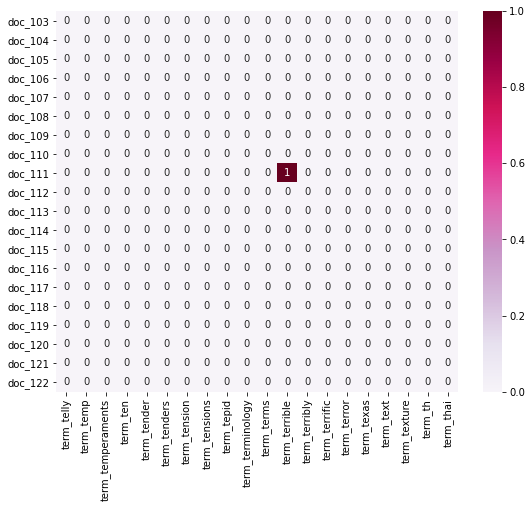

In [63]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

See how sparse the term-document matrix is and plot the histrogram. 

In [64]:
# finding which #sentence and term (#word) has correlation
maxx =np.argwhere(data_counts[0:,0:]>3)
print(maxx)

[[   4 4603]
 [  63 4525]
 [ 158 4525]
 [ 624 4525]
 [ 642 4525]
 [ 706 2977]
 [ 712 4525]
 [ 816 4525]
 [ 914  215]
 [ 997  213]
 [ 997  215]
 [ 997  272]
 [ 997  296]
 [ 997  636]
 [ 997 1581]
 [ 997 1737]
 [ 997 1824]
 [ 997 1878]
 [ 997 1916]
 [ 997 1988]
 [ 997 2309]
 [ 997 2422]
 [ 997 2427]
 [ 997 2488]
 [ 997 2643]
 [ 997 2931]
 [ 997 2949]
 [ 997 3058]
 [ 997 3092]
 [ 997 3117]
 [ 997 3119]
 [ 997 3123]
 [ 997 3139]
 [ 997 3154]
 [ 997 3914]
 [ 997 4523]
 [ 997 4525]
 [ 997 4539]
 [ 997 4542]
 [ 997 4552]
 [ 997 4603]
 [ 997 4636]
 [ 997 4884]
 [ 997 4962]
 [ 997 5063]
 [1037 4525]
 [1111 1737]
 [1111 2422]
 [1111 2427]
 [1111 2949]
 [1111 3092]
 [1111 4525]
 [1111 4552]
 [1112   75]
 [1112  116]
 [1112  178]
 [1112  213]
 [1112  215]
 [1112  272]
 [1112  296]
 [1112  372]
 [1112  415]
 [1112  636]
 [1112  645]
 [1112  672]
 [1112 1284]
 [1112 1575]
 [1112 1585]
 [1112 1598]
 [1112 1737]
 [1112 1742]
 [1112 1824]
 [1112 1988]
 [1112 2018]
 [1112 2108]
 [1112 2117]
 [1112 2180]

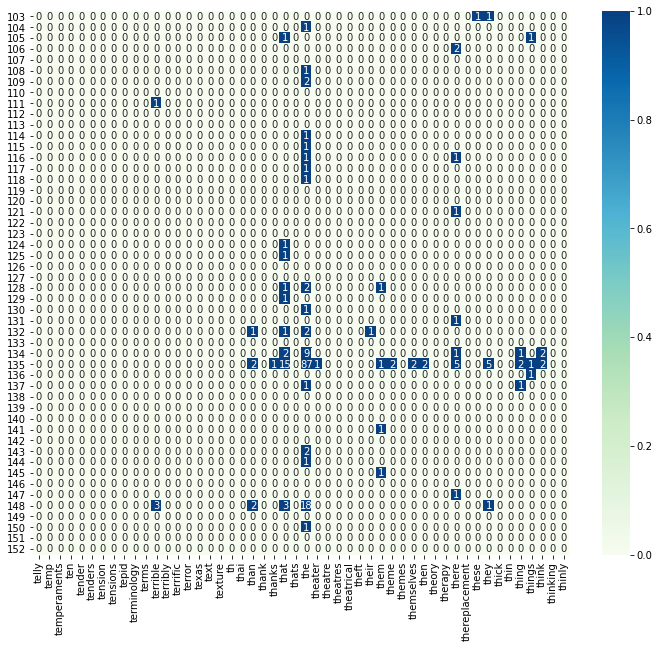

In [65]:
#get features first (term#4500-4550)
plot_a = [str(i) for i in count_vect.get_feature_names()[4500:4550]]

# obtain sentence (1080-1130)
plot_b = [str(i) for i in list(data.index)[1080:1130]]

plot_c = data_counts[1080:1130, 4500:4550].toarray()

#plot
import seaborn as sns

df_todraw = pd.DataFrame(plot_c, columns = plot_a, index = plot_b)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw,
                 cmap="GnBu",
                 vmin=0, vmax=1, annot=True)

---

---

### 5.4 Dimensionality Reduction
It is good for just the fact that is an excellent technique for visualizing data efficiently

In [66]:
from sklearn.decomposition import PCA

In [67]:
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())

In [68]:
data_reduced.shape

(2711, 2)

In [69]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix= vectorizer.fit_transform(data['sentence'])
print(tfidf_matrix.toarray())

# Import the cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
# Compute the cosine score
score = cosine_similarity(tfidf_matrix)
# Print the cosine score
score
# cosine score of pair document, in NLP value is (0,1)
# highest similarity score=1 of that keyword with other keyword of all document

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.05207178, ..., 0.        , 0.01722983,
        0.03841247],
       [0.        , 0.05207178, 1.        , ..., 0.        , 0.01523449,
        0.01132134],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12092689,
        0.        ],
       [0.        , 0.01722983, 0.01523449, ..., 0.12092689, 1.        ,
        0.05913298],
       [0.        , 0.03841247, 0.01132134, ..., 0.        , 0.05913298,
        1.        ]])

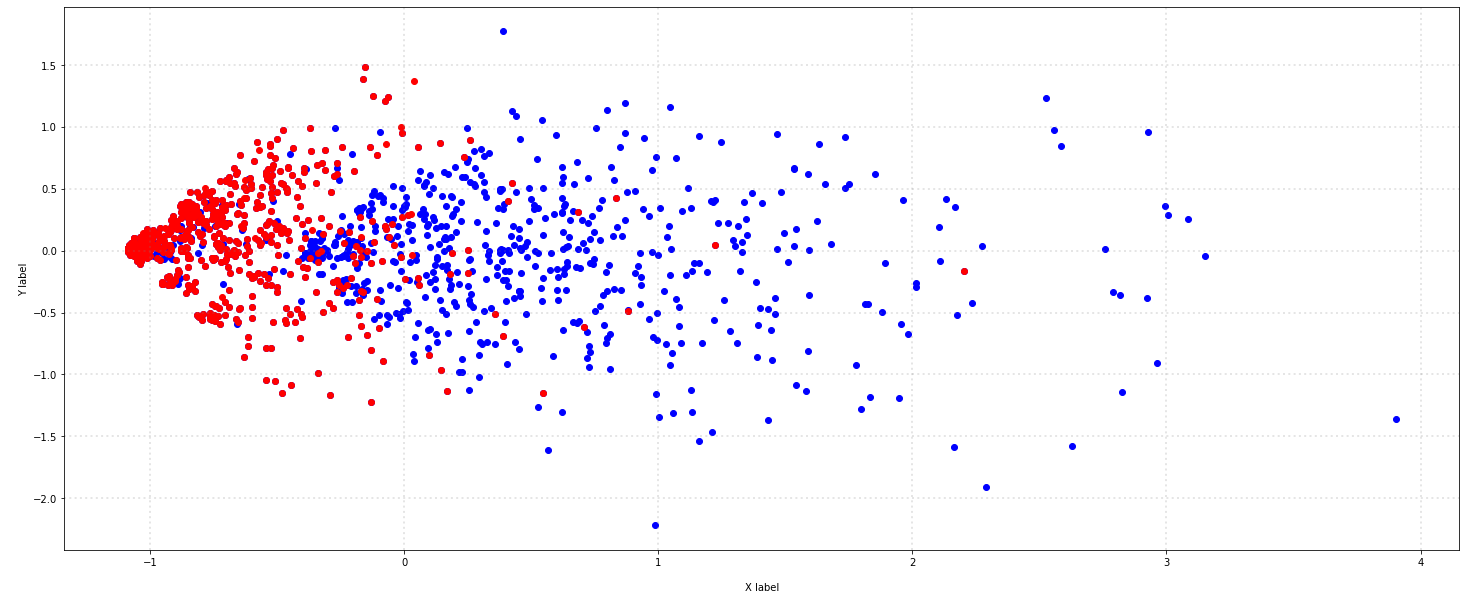

In [70]:
col = ['blue', 'red']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, d in zip(col, score):
    xs = data_reduced[data['score'] == d].T[0]
    ys = data_reduced[data['score'] == d].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX label')
ax.set_ylabel('\nY label')

plt.show()

Try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

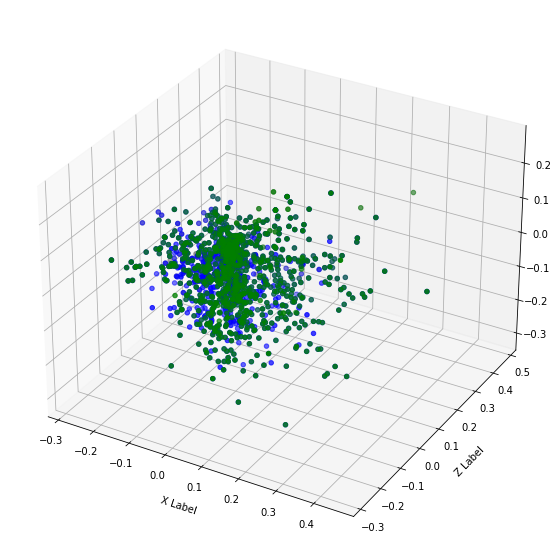

In [71]:
# pca transformation to 3D
data_3d = PCA(n_components = 3).fit_transform(tfidf_matrix.toarray())
col = ['blue','grey','green']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
for c, x in zip(col, score):
    xs = data_3d[data['score'] == x].T[0]
    ys = data_3d[data['score'] == x].T[1]
    zs = data_3d[data['score'] == x].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_ylabel('\nZ Label')

plt.show()

---

### 5.5 Atrribute Transformation / Aggregation
Generating a simple distribution of the words found in all the entire set of articles.

In [72]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

In [73]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

In [74]:
term_frequencies[0]

1

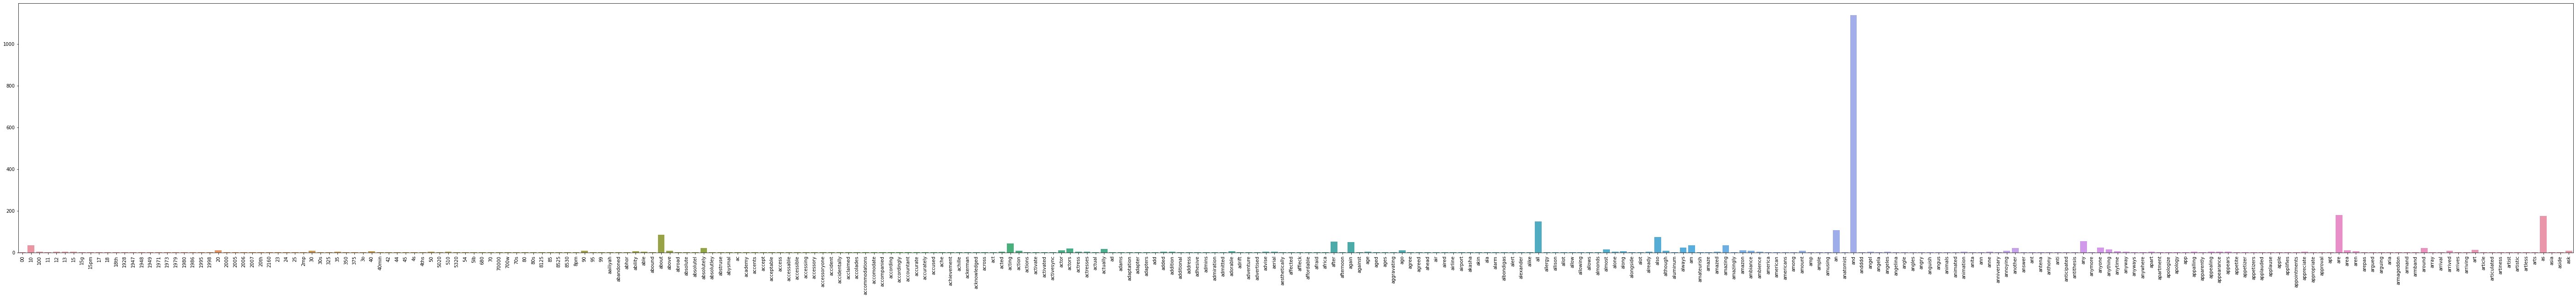

In [75]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

Using matplotlib

[Text(0, 0, 'telly'),
 Text(1, 0, 'temp'),
 Text(2, 0, 'temperaments'),
 Text(3, 0, 'ten'),
 Text(4, 0, 'tender'),
 Text(5, 0, 'tenders'),
 Text(6, 0, 'tension'),
 Text(7, 0, 'tensions'),
 Text(8, 0, 'tepid'),
 Text(9, 0, 'terminology'),
 Text(10, 0, 'terms'),
 Text(11, 0, 'terrible'),
 Text(12, 0, 'terribly'),
 Text(13, 0, 'terrific'),
 Text(14, 0, 'terror'),
 Text(15, 0, 'texas'),
 Text(16, 0, 'text'),
 Text(17, 0, 'texture'),
 Text(18, 0, 'th'),
 Text(19, 0, 'thai'),
 Text(20, 0, 'than'),
 Text(21, 0, 'thank'),
 Text(22, 0, 'thanks'),
 Text(23, 0, 'that'),
 Text(24, 0, 'thats'),
 Text(25, 0, 'the'),
 Text(26, 0, 'theater'),
 Text(27, 0, 'theatre'),
 Text(28, 0, 'theatres'),
 Text(29, 0, 'theatrical'),
 Text(30, 0, 'theft'),
 Text(31, 0, 'their'),
 Text(32, 0, 'them'),
 Text(33, 0, 'theme'),
 Text(34, 0, 'themes'),
 Text(35, 0, 'themselves'),
 Text(36, 0, 'then'),
 Text(37, 0, 'theory'),
 Text(38, 0, 'therapy'),
 Text(39, 0, 'there'),
 Text(40, 0, 'thereplacement'),
 Text(41, 0, 'the

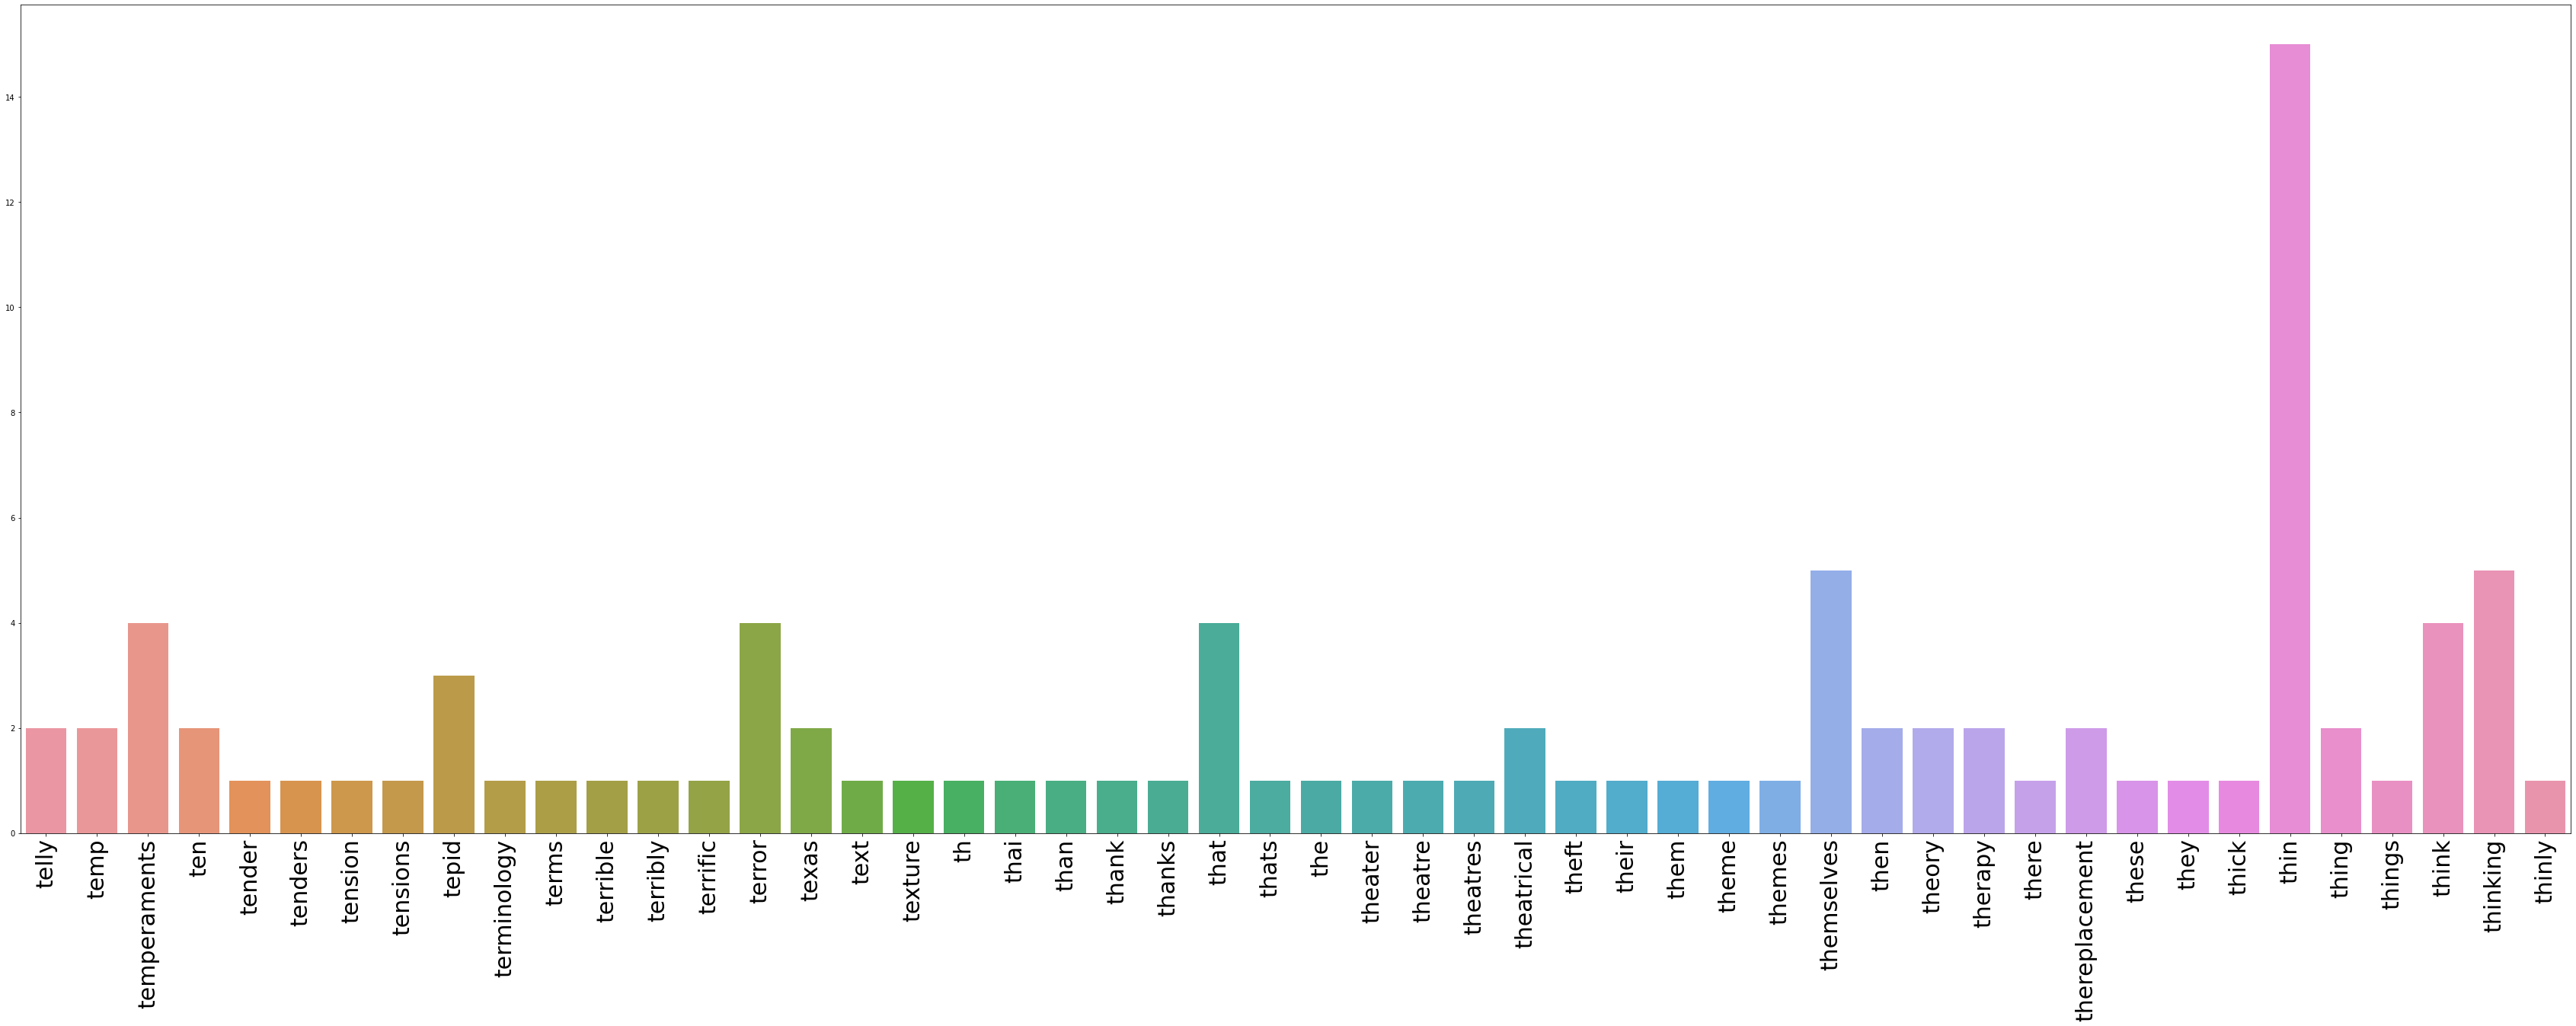

In [76]:
#using matplotlib
#%matplotlib notebook
#set up size
plt.subplots(figsize=(60, 20))
g = sns.barplot(x=count_vect.get_feature_names()[4500:4550], 
                y=term_frequencies[1080:1130])
g.set_xticklabels(count_vect.get_feature_names()[4500:4550], rotation = 90, fontsize = 30)

---

Reduce the number of terms 


[Text(0, 0, 'telly'),
 Text(1, 0, 'temp'),
 Text(2, 0, 'temperaments'),
 Text(3, 0, 'ten'),
 Text(4, 0, 'tender'),
 Text(5, 0, 'tenders'),
 Text(6, 0, 'tension'),
 Text(7, 0, 'tensions'),
 Text(8, 0, 'tepid'),
 Text(9, 0, 'terminology'),
 Text(10, 0, 'terms'),
 Text(11, 0, 'terrible'),
 Text(12, 0, 'terribly'),
 Text(13, 0, 'terrific'),
 Text(14, 0, 'terror'),
 Text(15, 0, 'texas'),
 Text(16, 0, 'text'),
 Text(17, 0, 'texture'),
 Text(18, 0, 'th'),
 Text(19, 0, 'thai'),
 Text(20, 0, 'than'),
 Text(21, 0, 'thank'),
 Text(22, 0, 'thanks'),
 Text(23, 0, 'that'),
 Text(24, 0, 'thats'),
 Text(25, 0, 'the'),
 Text(26, 0, 'theater'),
 Text(27, 0, 'theatre'),
 Text(28, 0, 'theatres'),
 Text(29, 0, 'theatrical'),
 Text(30, 0, 'theft'),
 Text(31, 0, 'their'),
 Text(32, 0, 'them'),
 Text(33, 0, 'theme'),
 Text(34, 0, 'themes'),
 Text(35, 0, 'themselves'),
 Text(36, 0, 'then'),
 Text(37, 0, 'theory'),
 Text(38, 0, 'therapy'),
 Text(39, 0, 'there'),
 Text(40, 0, 'thereplacement'),
 Text(41, 0, 'the

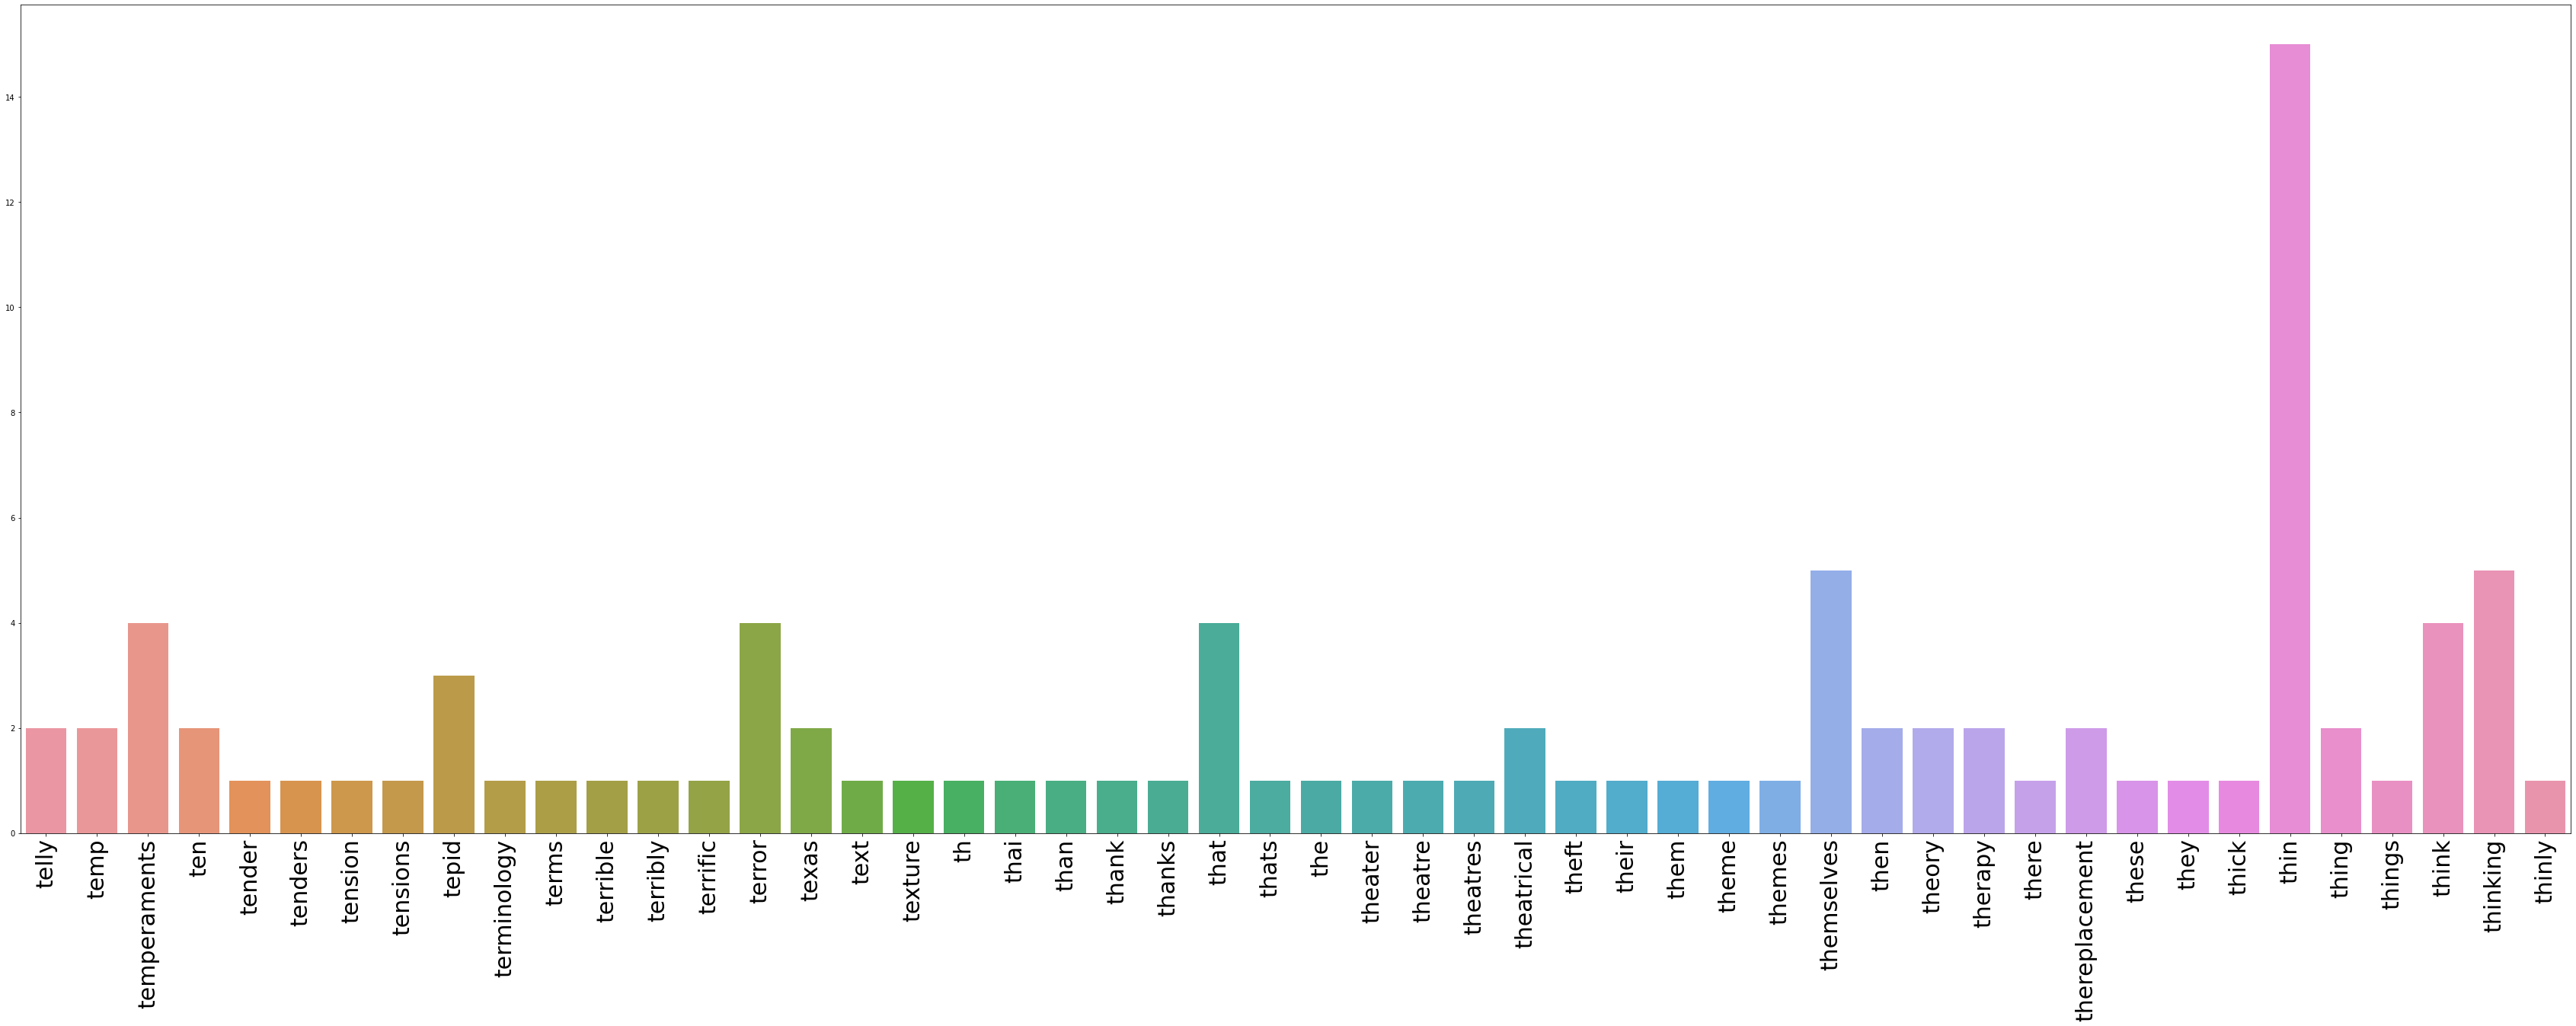

In [77]:
#using matplotlib
#%matplotlib notebook
#set up size
plt.subplots(figsize=(60, 20))
g = sns.barplot(x=count_vect.get_feature_names()[4500:4550], 
                y=term_frequencies[1080:1130])
g.set_xticklabels(count_vect.get_feature_names()[4500:4550], rotation = 90, fontsize = 30)

---

Long Tail Visualization by sorting term (word), for seeing which words were found the most

In [78]:
# create simple distribution
count_vect = CountVectorizer(min_df=50)
data_counts = count_vect.fit_transform(data.sentence)

term_frequencies = []
for i in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,i].toarray()))

term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

In [79]:
# sort array
sort_arr = np.sort(term_frequencies)

# reserve array
reverse_arr = sort_arr[::-1]

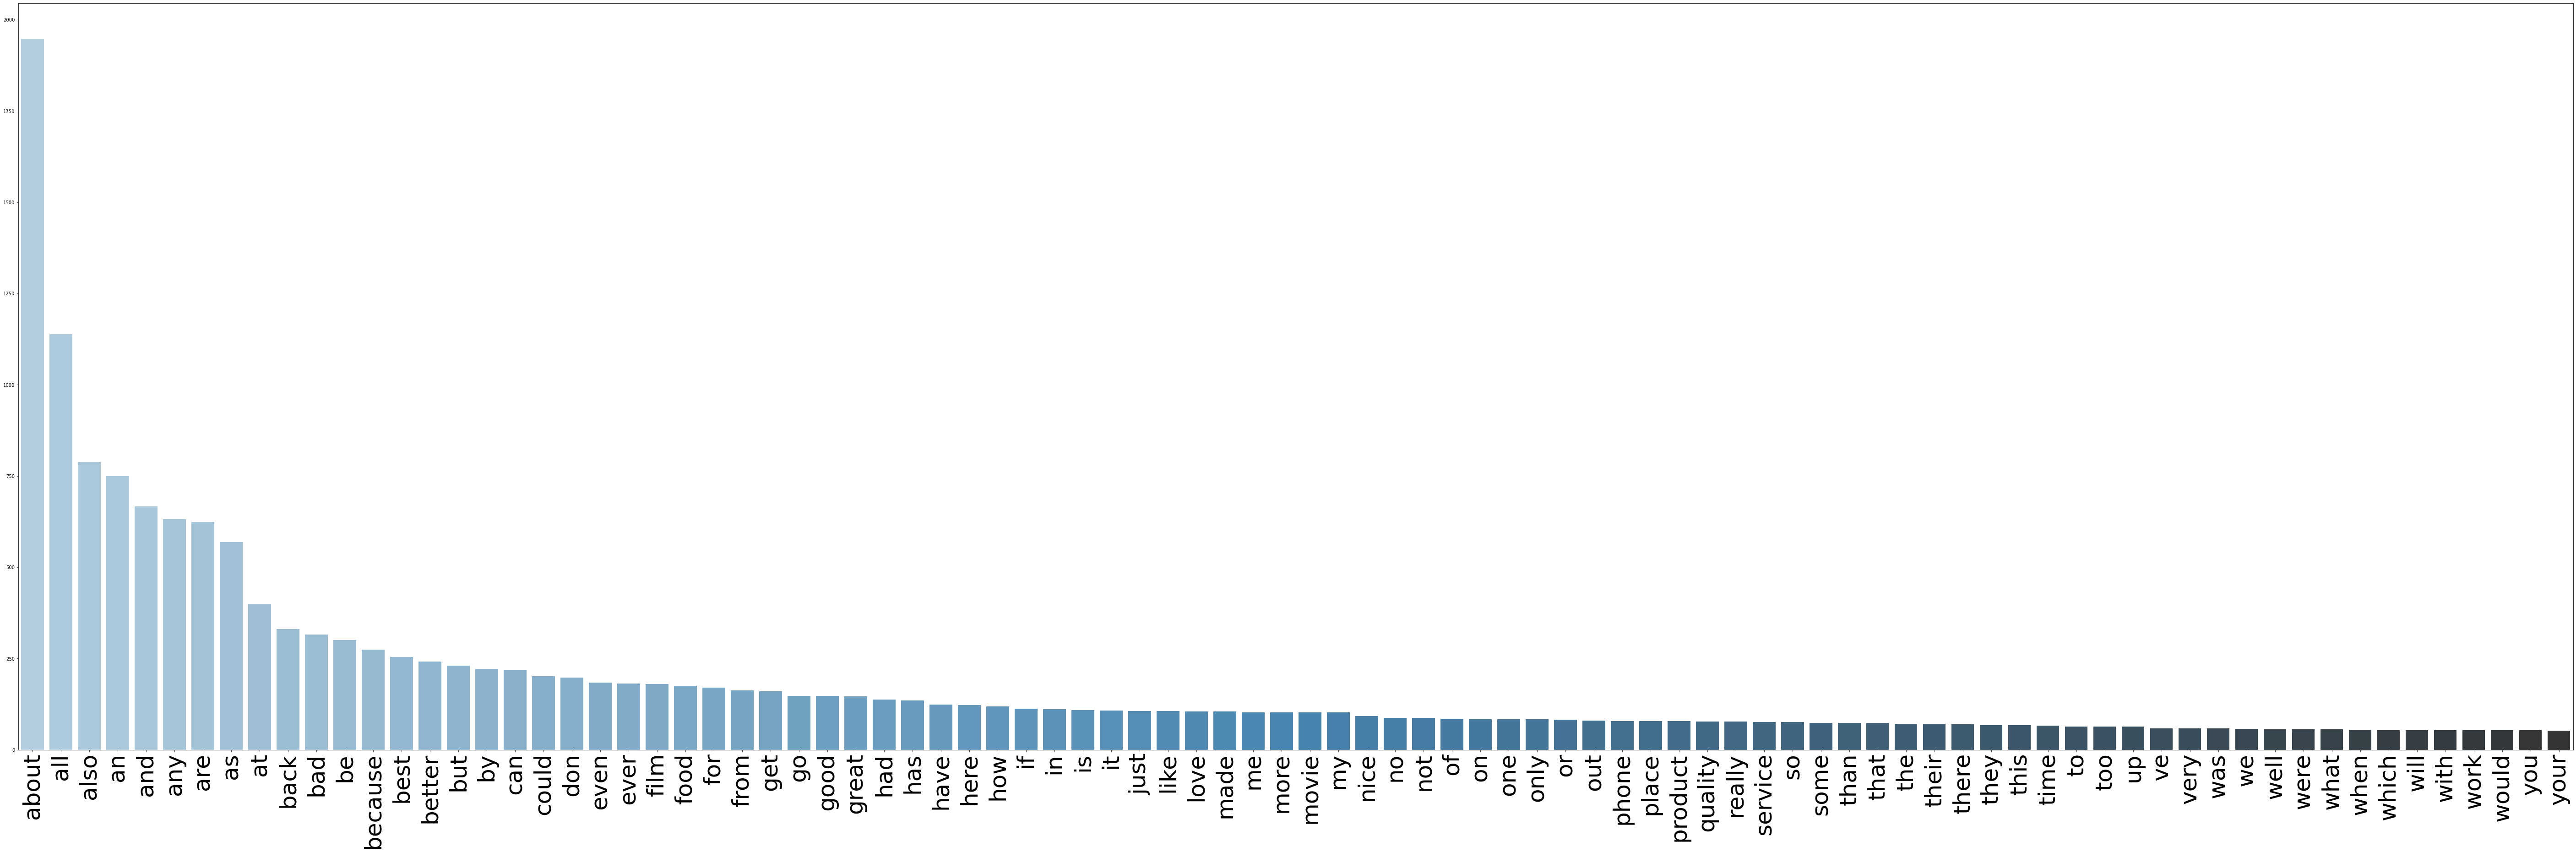

In [80]:
# create a long tail bar
plt.subplots(figsize=(100, 30))
g = sns.barplot(x=count_vect.get_feature_names(), 
                y=reverse_arr, palette="Blues_d")
g.set_xticklabels(count_vect.get_feature_names(), rotation = 90, fontsize=50)
plt.show()

---

Transform the values in that vector into the log distribution.

In [81]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

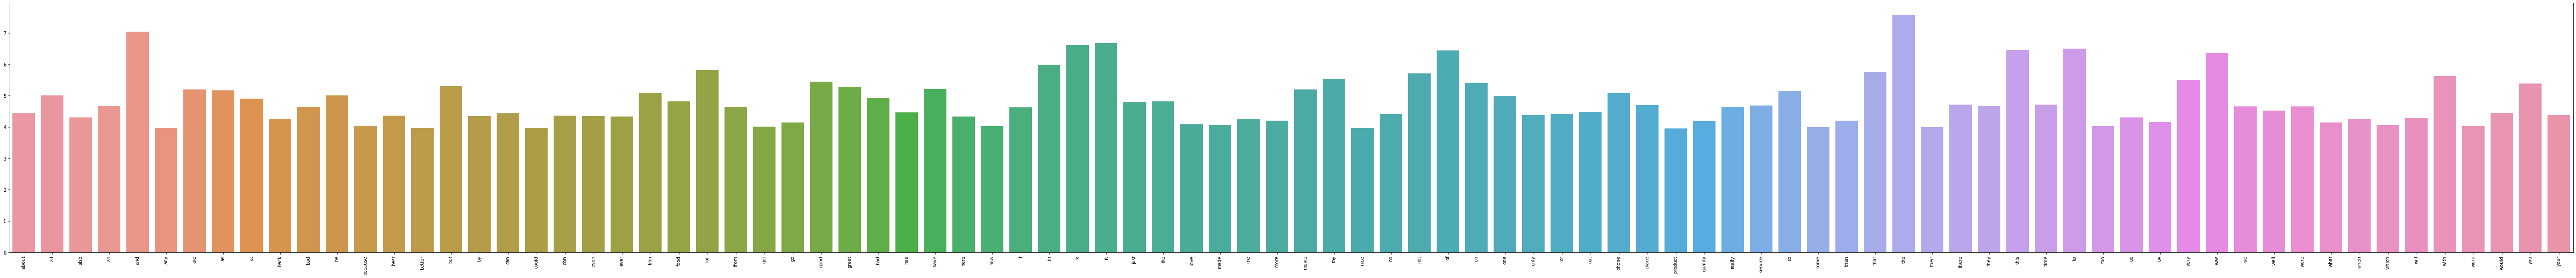

In [82]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### 5.6 Discretization and Binarization

In [83]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [84]:
mlb = preprocessing.LabelBinarizer()

In [85]:
mlb.fit(data.source)

LabelBinarizer()

In [86]:
mlb.classes_

array(['amazon.com', 'imdb.com', 'yelp.com'], dtype='<U10')

In [87]:
data['bin_source'] = mlb.transform(data['source']).tolist()

In [88]:
data[0:9]

,sentence,score,source,length,sentiment,unigrams,bin_source
0,"Good case, Excellent value.",1,amazon.com,27,positive,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
1,Great for the jawbone.,1,amazon.com,22,positive,"[Great, for, the, jawbone, .]","[1, 0, 0]"
2,Tied to charger for conversations lasting more...,0,amazon.com,79,negative,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
3,The mic is great.,1,amazon.com,17,positive,"[The, mic, is, great, .]","[1, 0, 0]"
4,I have to jiggle the plug to get it to line up...,0,amazon.com,74,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
5,If you have several dozen or several hundred c...,0,amazon.com,111,negative,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
6,If you are Razr owner...you must have this!,1,amazon.com,43,positive,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
7,"Needless to say, I wasted my money.",0,amazon.com,35,negative,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"
8,What a waste of money and time!.,0,amazon.com,32,negative,"[What, a, waste, of, money, and, time, !, .]","[1, 0, 0]"


---

# 6. Data Exploration

Understand the relationships in your dataset, focus in a similarity example. Let's take 3 sentences and compare.

In [89]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

Let's look at our sentences.

In [91]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['A usable keyboard actually turns a PDA into a real-world useful machine instead of just a neat gadget.']
['Definitely a bargain.']
['I had absolutely no problem with this headset linking to my 8530 Blackberry Curve!']


In [92]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]


In [93]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 0.000000


----

# 7. New Data Visualizations

Generate meaningful new data visualizations.

Side-by-side comparison of the distribution between 2 sentiments of each source (amazon, imdb, yelp)

source      sentiment
amazon.com  negative     493
            positive     486
imdb.com    positive     382
            negative     359
yelp.com    positive     497
            negative     494
Name: sentiment, dtype: int64


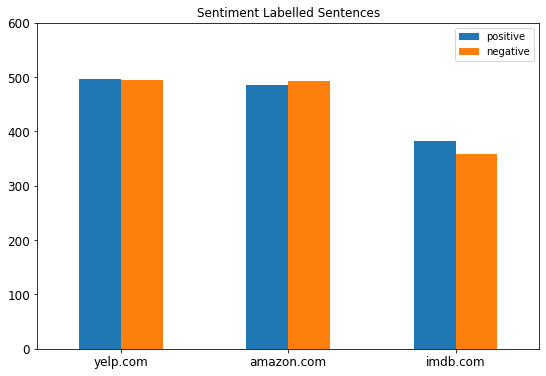

In [94]:
# summarize data, group by each source and count by sentiment
x = data.groupby('source')['sentiment'].value_counts()
print(x)

# create 2 data; positive and negative
positive = data[data['sentiment'] == 'positive']
negative = data[data['sentiment'] == 'negative']

for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
        
# plot barchart
df = pd.DataFrame({'positive': positive.source.value_counts(),
                   'negative': negative.source.value_counts()})
ax = df.plot.bar(title = 'Sentiment Labelled Sentences',
                 ylim = [0, 600],rot = 0, fontsize = 12,
                 figsize = (9,6))


# 8. TF-IDF features

Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).

In [95]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix= vectorizer.fit_transform(data['sentence'])
print(tfidf_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [96]:
# Import the cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
# Compute the cosine score
score = cosine_similarity(tfidf_matrix)
# Print the cosine score
score
# cosine score of pair document, in NLP value is (0,1)
# highest similarity score=1 of that keyword with other keyword of all document

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.05207178, ..., 0.        , 0.01722983,
        0.03841247],
       [0.        , 0.05207178, 1.        , ..., 0.        , 0.01523449,
        0.01132134],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12092689,
        0.        ],
       [0.        , 0.01722983, 0.01523449, ..., 0.12092689, 1.        ,
        0.05913298],
       [0.        , 0.03841247, 0.01132134, ..., 0.        , 0.05913298,
        1.        ]])

In [97]:
# Import the cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine score
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
# Print the cosine score
cosine_sim
# cosine score of pair document, in NLP value is (0,1)
# highest similarity score=1 of that keyword with other keyword of all document

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.05207178, ..., 0.        , 0.01722983,
        0.03841247],
       [0.        , 0.05207178, 1.        , ..., 0.        , 0.01523449,
        0.01132134],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12092689,
        0.        ],
       [0.        , 0.01722983, 0.01523449, ..., 0.12092689, 1.        ,
        0.05913298],
       [0.        , 0.03841247, 0.01132134, ..., 0.        , 0.05913298,
        1.        ]])

# 9. Naive Bayes classifier

Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. 

In [98]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

In [99]:
#Model 1, prepare performance evaluation from data counts, train size=0.8, test size=0.2
a_train1, a_test1, b_train1, b_test1 = train_test_split(data_counts, data.score, test_size=0.2)

model_counts = MultinomialNB()
model_counts.fit(a_train1, b_train1)

MultinomialNB()

In [100]:
#Model 1, Accuracy score
model_counts.score(a_test1, b_test1)

0.6574585635359116

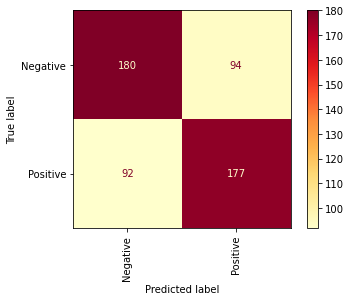

In [101]:
plot_confusion_matrix(model_counts, a_test1, b_test1, display_labels=['Negative', 'Positive'], cmap="YlOrRd", xticks_rotation='vertical')

In [102]:
#Model 2, performance evaluation from tfidf matrix, train size=0.8, test size=0.2
a_train2, a_test2, b_train2, b_test2 = train_test_split(tfidf_matrix, data.score, test_size=0.2)

model_tfidf = MultinomialNB()
model_tfidf.fit(a_train2, b_train2)

MultinomialNB()

In [103]:
model_tfidf.score(a_test2, b_test2)

0.8213627992633518

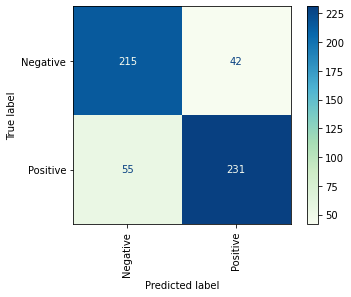

In [104]:
plot_confusion_matrix(model_tfidf, a_test2, b_test2, display_labels=['Negative', 'Positive'], cmap='GnBu', xticks_rotation='vertical')

# Conclusion
Comparing 2 models from using Naive Bayes classifier
Data: Train size = 0.8, Test size = 0.2
1. Model 1: data_counts which is term-document matrix
2. Model 2: TD-IDF features

Found that the accuracy rate of Model 2 as 0.65 > Model 1 as 0.82

From metrics for performance evalution, Model 2 has True Positive & True Negative more than Model 1